# BINARY CLASSIFICATION

* ### Importing Required python libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

* ### Data Pre-Processing

In [3]:
test = pd.read_csv('test_1.csv')
train = pd.read_csv('train.csv')

In [4]:
test.head()

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


In [5]:
train.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [6]:
# Shape of each set

print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)

Shape of TRAIN DATA:  (10240, 2)
Shape of TEST DATA:  (2551, 2)


In [7]:
train.describe(), test.describe()

(                                                Statement  Label
 count                                               10240  10240
 unique                                              10223      2
 top     On changing the rules for filibusters on presi...   True
 freq                                                    3   5752,
                                                 Statement Label
 count                                                2551  2551
 unique                                               2551     2
 top     2014 midterm election spending by the left and...  True
 freq                                                    1  1382)

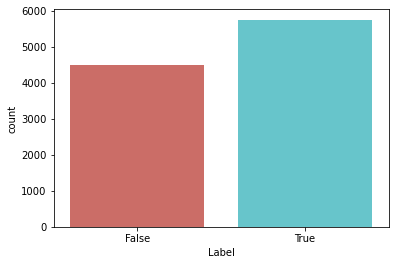

In [8]:
# Distribution of classes for prediction
def Class_Distr(datafile):
      return sb.countplot(x='Label' , data= datafile, palette='hls')

# Even Distribution of data between Train,Test and Valid dataset

Class_Distr(train)
Class_Distr(test)

* ### Data Cleaning and Quality checking

In [9]:
def Data_Clean():
  print("Processing...")
# Train
  train.isnull().sum()
  train.info()
# Test
  test.isnull().sum()
  test.info()
Data_Clean()
print("Cleaning over..")

Processing...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
Cleaning over..


In [10]:
# Saving the original Data for future

train_orig = train.copy()
test_orig = test.copy()

In [11]:
# Stemming 
# Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the 
# roots of words known as a lemma.

def stemming(str_tokens, str_stemmer):
    stemmed_str = []
    for token_i in str_token:
        stemmed.append(str_stemmer.stem(token_i))
    return stemmed

In [12]:
# Data processing

def data_process(data, exclude_stopword = True, stem = True):
    str_tokens = [w.lower() for w in data]
    stemmed_tokens = str_tokens
    stemmed_tokens = stemming(str_tokens, eng_stemmer)
    stemmed_tokens = [w for w in stemmed_tokens if w not in stopwords ]
    return tokens_stemmed

In [13]:
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    gap = 0
    joinned_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,gap+2):
                if i+k < Len:
                    lst.append(joinned_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [14]:
# Trigram creation

def create_trigrams(words):
    assert type(words) == list
    gap == 0
    joinned_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,gap+2):
            for k1 in range(1, gap+2):
                for k2 in range(1,gap+2):
                    if i+k1 < Len and i+k1+k2 < Len:
                        lst.append(joinned_str.join([words[i], words[i+k1],words[i+k1+k2]]))
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst

In [15]:
#The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and 
#inflexional endings from words in English. Its main use is as part of a term normalisation process that is 
#usually done when setting up Information Retrieval systems.

porter_str = PorterStemmer()

In [16]:
def porter_tokenizer(statement):
    return [porter.stem(word) for word in statement.split()]

* ## Feature Scaling

In [17]:
! pip install gensim

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\s

[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]  

[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]    |  

True

## Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document.

This can be done by assigning each word a unique number. Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

In [19]:
# creating word matrix  with bag of word technique
countV = CountVectorizer()
train_count = countV.fit_transform(train['Statement'].values)

print(countV)
print(train_count)

def countVectorizer_matrix():
    
    #vocab size
    train_count.shape
    #checking vocabulary 
    print(countV.vocabulary_)
    #get feature names
    print(countV.get_feature_names()[:25])

CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


In [20]:
# create tf-df features 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

TFIDF: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [21]:
def tfidf_matrix():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf = True,smooth_idf = True)

In [22]:
# Tags
nltk.download('averaged_perceptron_tagger')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train['Statement']
 
print(training_sentences)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object


### Training Features


In [23]:
def features_Scale(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    

In [24]:
# Fuction to strips the tags

def untagging(tagged_sentences):
    return [w for w,t in tagged_sentences]

# Applying Word2vec

with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [25]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


## Classifications
* Binary Classification

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve,  GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



* Using Bag Words Technique

using previous features that we scaled we classify the dataset with:
* Random Forest Classification Algorithm
* LSTM Classification Algorithm

In [28]:
#Random Forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=2))
        ])
print("Accuracy: ")    
random_forest.fit(train['Statement'],train['Label'])
predicted_rf = random_forest.predict(test['Statement'])
np.mean(predicted_rf == test['Label'])

Accuracy: 


0.6244609956879655

In [29]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\shubh\anaconda3\lib\site-packages (0.24.1)


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Confusion Matrix ==> \n\n", confusion_matrix(test['Label'], predicted_rf))
print("\n\n Accuracy Score: ", accuracy_score(test['Label'], predicted_rf)*100)

print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(test['Label'], predicted_rf))


Confusion Matrix ==> 

 [[ 486  683]
 [ 275 1107]]


 Accuracy Score:  62.446099568796555

____________________________________________________________________

Classification Report of Random Forest: 

               precision    recall  f1-score   support

       False       0.64      0.42      0.50      1169
        True       0.62      0.80      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.63      0.61      0.60      2551
weighted avg       0.63      0.62      0.61      2551



* ### LSTM Model of Classification

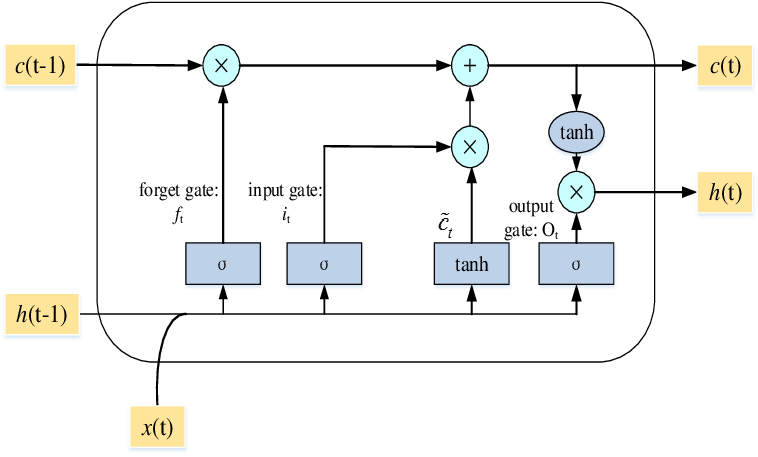

In [42]:
from IPython.display import Image
Image("lstm.png")

In [31]:
# LSTM Model
import pandas as pd
import numpy as np
import keras
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras import optimizers
from keras.models import Sequential
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train)
sequences = tok.texts_to_sequences(train['Statement'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
# Recurrent Neural Network
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    # kernel_regularizer=keras.regularizers.l2(0.001)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    # sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    #keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [32]:
# embedding_vecor_length = 32
# top_words = 5000
# max_review_length = 150
# model = Sequential()
# model.add(Embedding(top_words+2, embedding_vecor_length, input_length=max_review_length))
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.summary()
# model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [34]:
# Training of model
model.fit(sequences_matrix,train['Label'],batch_size=512,epochs=10,
          validation_split=0.2,
          # callbacks=[(monitor='val_loss',min_delta=0.01)]
          )

Epoch 1/10
16/16 [==============================] - 20s 549ms/step - loss: 0.6873 - accuracy: 0.5477 - val_loss: 0.6918 - val_accuracy: 0.5479
Epoch 2/10
16/16 [==============================] - 6s 352ms/step - loss: 0.6865 - accuracy: 0.5611 - val_loss: 0.6891 - val_accuracy: 0.5479
Epoch 3/10
16/16 [==============================] - 6s 377ms/step - loss: 0.6879 - accuracy: 0.5556 - val_loss: 0.6891 - val_accuracy: 0.5479
Epoch 4/10
16/16 [==============================] - 6s 400ms/step - loss: 0.6847 - accuracy: 0.5676 - val_loss: 0.6893 - val_accuracy: 0.5479
Epoch 5/10
16/16 [==============================] - 6s 394ms/step - loss: 0.6865 - accuracy: 0.5611 - val_loss: 0.6889 - val_accuracy: 0.5479
Epoch 6/10
16/16 [==============================] - 7s 431ms/step - loss: 0.6845 - accuracy: 0.5666 - val_loss: 0.6889 - val_accuracy: 0.5479
Epoch 7/10
16/16 [==============================] - 6s 402ms/step - loss: 0.6849 - accuracy: 0.5650 - val_loss: 0.6894 - val_accuracy: 0.5479
Epoch

In [35]:
test_sequences = tok.texts_to_sequences(test['Statement'])
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [36]:
accr = model.evaluate(test_sequences_matrix,test['Label'])

80/80 [==============================] - 2s 16ms/step - loss: 0.6917 - accuracy: 0.5417


In [37]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.692
  Accuracy: 0.542


* ## Random Forest Model Prediction and Text Verification

In [38]:
import pickle
Saved_model = 'Model(task-1).sav'
pickle.dump(random_forest,open(Saved_model,'wb'))

In [39]:
var = input("Enter the news text you want to test or verify: ")
print("Your Entry: " + str(var))

def detecting_fake_news(var):    
    load_model = pickle.load(open('Model(task-1).sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("Folowing Statement predicted as: ",prediction[0]),
        print("The truth probability score will be: ",prob[0][1]))
  
if __name__ == '__main__':
    detecting_fake_news(var)

Enter the news text you want to test or verify: Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile
Your Entry: Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile
Folowing Statement predicted as:  False
The truth probability score will be:  0.17333333333333334
